# Predicting House Sale Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
pd.options.display.max_columns = 999

In [3]:
df=pd.read_csv("AmesHousing.tsv",delimiter="\t")
train=df[0:1460]
test=df[1460:]

In [4]:
def transform_features(df):
    return df
def select_features(df):
    return df[["Gr Liv Area","SalePrice"]]
def train_and_test(df):
    train=df[0:1460]
    test=df[1460:]
    
    numeric_train=train.select_dtypes(include=["integer","float"])
    numeric_test=test.select_dtypes(inlcude=["integer","float"])
    features=numeric_train.columns.drop("SalePrice")
    
    lr=linear_model.LinearRegression()
    lr.fit(numeric_train[features],numeric_train["SalePrice"])
    
    
    test_predictions=lr.predict(numeric_test[features])
    mse=mean_squared_error(test_predictions,test["SalePrice"])
    rmse=mse**0.5
    return rmse

## dropping/replace columns with missing values:
1) columns with more than 5% null values.

2) text columns with 1 or more null values.

3) dont drop but replace null values of numerical columns with most frequently used value.

In [5]:
df_null_count=df.isnull().sum()
df_null_count

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [6]:
df_null_percentage=(df_null_count/len(df))*100
df_null_percentage

Order              0.000000
PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
Lot Area           0.000000
Street             0.000000
Alley             93.242321
Lot Shape          0.000000
Land Contour       0.000000
Utilities          0.000000
Lot Config         0.000000
Land Slope         0.000000
Neighborhood       0.000000
Condition 1        0.000000
Condition 2        0.000000
Bldg Type          0.000000
House Style        0.000000
Overall Qual       0.000000
Overall Cond       0.000000
Year Built         0.000000
Year Remod/Add     0.000000
Roof Style         0.000000
Roof Matl          0.000000
Exterior 1st       0.000000
Exterior 2nd       0.000000
Mas Vnr Type       0.784983
Mas Vnr Area       0.784983
Exter Qual         0.000000
Exter Cond         0.000000
                    ...    
Bedroom AbvGr      0.000000
Kitchen AbvGr      0.000000
Kitchen Qual       0.000000
TotRms AbvGrd      0.000000
Functional         0

In [7]:
drop_cols=df_null_percentage[df_null_percentage>5].sort_values()

In [8]:
df=df.drop(drop_cols.index,axis=1)

In [9]:
numerical_cols=df.select_dtypes(include=["int","float"]).columns
string_cols=df.select_dtypes(include=["object"]).columns

df[numerical_cols]=df[numerical_cols].fillna(df[numerical_cols].mode().iloc[0])

In [10]:
string_cols_null=df[string_cols].isnull().sum()
drop_string_cols=string_cols_null[string_cols_null>0]
df=df.drop(drop_string_cols.index,axis=1)

In [11]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,0.0,1045.0,2110.0,GasA,Ex,Y,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


In [12]:
df["years until remod"]=df["Year Remod/Add"]-df["Year Built"]
df["years before sale"]=df["Yr Sold"]-df["Year Built"]

In [13]:
df=df.drop(["Year Remod/Add","Year Built"],axis=1)

dropping columns:
* which are not useful for machine learning?
* which leak data about final sale

In [14]:
df=df.drop(["Order","PID"],axis=1)
## Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

In [15]:
def transform_features(df):
    df_null_count=df.isnull().sum()
    df_null_percentage=(df_null_count/len(df))*100
    drop_cols=df_null_percentage[df_null_percentage>5].sort_values()
    df=df.drop(drop_cols.index,axis=1)
    numerical_cols=df.select_dtypes(include=["int","float"]).columns
    string_cols=df.select_dtypes(include=["object"]).columns

    df[numerical_cols]=df[numerical_cols].fillna(df[numerical_cols].mode().iloc[0])
    string_cols_null=df[string_cols].isnull().sum()
    drop_string_cols=string_cols_null[string_cols_null>0]
    df=df.drop(drop_string_cols.index,axis=1)
    
    df["years until remod"]=df["Year Remod/Add"]-df["Year Built"]
    df["years before sale"]=df["Yr Sold"]-df["Year Built"]
    df=df.drop(["Year Remod/Add","Year Built"],axis=1)
    df=df.drop(["Order","PID"],axis=1)
    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    return df



def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]



def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse


In [16]:
df=pd.read_csv("AmesHousing.tsv",delimiter="\t")
transform_df=transform_features(df)
filter_df=select_features(transform_df)
rmse=train_and_test(filter_df)
rmse

57088.25161263909

In [17]:
numerical_df=transform_df.select_dtypes(include=["int","float"])
correlation=numerical_df.corr()["SalePrice"].abs().sort_values()
correlation

BsmtFin SF 2         0.006018
Misc Val             0.015691
3Ssn Porch           0.032225
Bsmt Half Bath       0.035817
Low Qual Fin SF      0.037660
Pool Area            0.068403
MS SubClass          0.085092
Overall Cond         0.101697
Screen Porch         0.112151
Kitchen AbvGr        0.119814
Enclosed Porch       0.128787
Bedroom AbvGr        0.143913
Bsmt Unf SF          0.183308
years until remod    0.240168
Lot Area             0.266549
2nd Flr SF           0.269373
Bsmt Full Bath       0.275823
Half Bath            0.285056
Open Porch SF        0.312951
Wood Deck SF         0.327143
BsmtFin SF 1         0.433147
Fireplaces           0.474558
TotRms AbvGrd        0.495474
Mas Vnr Area         0.502196
Full Bath            0.545604
years before sale    0.558907
1st Flr SF           0.621676
Total Bsmt SF        0.632529
Garage Area          0.640138
Garage Cars          0.647812
Gr Liv Area          0.706780
Overall Qual         0.799262
SalePrice            1.000000
Name: Sale

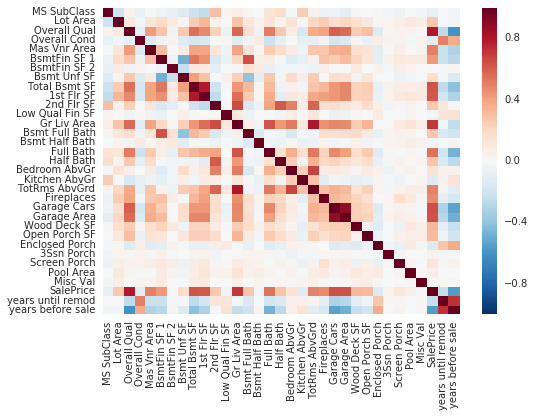

In [18]:
corrmat=numerical_df.corr()
sns.heatmap(corrmat)

In [19]:
strong_corr=correlation[correlation>0.4]
strong_corr

BsmtFin SF 1         0.433147
Fireplaces           0.474558
TotRms AbvGrd        0.495474
Mas Vnr Area         0.502196
Full Bath            0.545604
years before sale    0.558907
1st Flr SF           0.621676
Total Bsmt SF        0.632529
Garage Area          0.640138
Garage Cars          0.647812
Gr Liv Area          0.706780
Overall Qual         0.799262
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [20]:
transform_df=transform_df.drop(correlation[correlation<0.4].index,axis=1)

In [21]:
transform_df.head(10)

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,years before sale
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,2.0,528.0,P,215000,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1.0,730.0,Y,105000,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,6,Typ,0,1.0,312.0,Y,172000,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,8,Typ,2,2.0,522.0,Y,244000,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,Y,928,1629,2,TA,6,Typ,1,2.0,482.0,Y,189900,13
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,Gable,CompShg,VinylSd,VinylSd,20.0,TA,TA,PConc,602.0,926.0,GasA,Ex,Y,926,1604,2,Gd,7,Typ,1,2.0,470.0,Y,195500,12
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,Gable,CompShg,CemntBd,CmentBd,0.0,Gd,TA,PConc,616.0,1338.0,GasA,Ex,Y,1338,1338,2,Gd,6,Typ,0,2.0,582.0,Y,213500,9
7,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,Gable,CompShg,HdBoard,HdBoard,0.0,Gd,TA,PConc,263.0,1280.0,GasA,Ex,Y,1280,1280,2,Gd,5,Typ,0,2.0,506.0,Y,191500,18
8,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,Gable,CompShg,CemntBd,CmentBd,0.0,Gd,TA,PConc,1180.0,1595.0,GasA,Ex,Y,1616,1616,2,Gd,5,Typ,1,2.0,608.0,Y,236500,15
9,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,0.0,994.0,GasA,Gd,Y,1028,1804,2,Gd,7,Typ,1,2.0,442.0,Y,189000,11


In [22]:
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 38 columns):
MS Zoning            2930 non-null object
Street               2930 non-null object
Lot Shape            2930 non-null object
Land Contour         2930 non-null object
Utilities            2930 non-null object
Lot Config           2930 non-null object
Land Slope           2930 non-null object
Neighborhood         2930 non-null object
Condition 1          2930 non-null object
Condition 2          2930 non-null object
Bldg Type            2930 non-null object
House Style          2930 non-null object
Overall Qual         2930 non-null int64
Roof Style           2930 non-null object
Roof Matl            2930 non-null object
Exterior 1st         2930 non-null object
Exterior 2nd         2930 non-null object
Mas Vnr Area         2930 non-null float64
Exter Qual           2930 non-null object
Exter Cond           2930 non-null object
Foundation           2930 non-null object
BsmtFin SF 

In [23]:
string_cols=transform_df.select_dtypes(include=["object"]).columns
string_cols

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive'],
      dtype='object')

In [24]:
transform_df[string_cols].head(10)

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,TA,TA,CBlock,GasA,Fa,Y,TA,Typ,P
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,GasA,TA,Y,TA,Typ,Y
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,GasA,TA,Y,Gd,Typ,Y
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,Gd,TA,CBlock,GasA,Ex,Y,Ex,Typ,Y
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Gd,Y,TA,Typ,Y
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Ex,Y,Gd,Typ,Y
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,CemntBd,CmentBd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y
7,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y
8,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,CemntBd,CmentBd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y
9,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Gd,Y,Gd,Typ,Y


In [25]:
for col in string_cols:
    print(col+":",len(transform_df[col].unique()))

MS Zoning: 7
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 28
Condition 1: 9
Condition 2: 8
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 8
Exterior 1st: 16
Exterior 2nd: 17
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Heating: 6
Heating QC: 5
Central Air: 2
Kitchen Qual: 5
Functional: 8
Paved Drive: 3


In [26]:
for col in string_cols:
    print(col+":")
    print(transform_df[col].value_counts())
    print("-------------------------------------------------------------")

MS Zoning:
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64
-------------------------------------------------------------
Street:
Pave    2918
Grvl      12
Name: Street, dtype: int64
-------------------------------------------------------------
Lot Shape:
Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64
-------------------------------------------------------------
Land Contour:
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: Land Contour, dtype: int64
-------------------------------------------------------------
Utilities:
AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
-------------------------------------------------------------
Lot Config:
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64
-------------------------------------------------------------
Land Slope:
Gtl    27

In [27]:
unique_counts=transform_df[string_cols].apply(lambda x: len(x.unique())).sort_values()

In [28]:
unique_counts

Street           2
Central Air      2
Paved Drive      3
Utilities        3
Land Slope       3
Lot Shape        4
Land Contour     4
Exter Qual       4
Lot Config       5
Kitchen Qual     5
Heating QC       5
Bldg Type        5
Exter Cond       5
Heating          6
Foundation       6
Roof Style       6
MS Zoning        7
Roof Matl        8
Functional       8
House Style      8
Condition 2      8
Condition 1      9
Exterior 1st    16
Exterior 2nd    17
Neighborhood    28
dtype: int64

In [29]:
transform_df.head()  

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,years before sale
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,2.0,528.0,P,215000,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1.0,730.0,Y,105000,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,6,Typ,0,1.0,312.0,Y,172000,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,8,Typ,2,2.0,522.0,Y,244000,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,Y,928,1629,2,TA,6,Typ,1,2.0,482.0,Y,189900,13


In [30]:
drop_cols_high_unique_vals=unique_counts[unique_counts>10].index

In [31]:
transform_df=transform_df.drop(transform_df[drop_cols_high_unique_vals],axis=1)

In [32]:
string_cols=transform_df.select_dtypes(include=["object"])
for col in string_cols:
    transform_df[col]=transform_df[col].astype("category")
transform_df=pd.concat([transform_df,
                        pd.get_dummies(transform_df.select_dtypes(include=["category"]))],
                       axis=1).drop(string_cols,axis=1)

In [33]:
transform_df.shape

(2930, 129)

In [38]:
def transform_features(df):
    df_null_count=df.isnull().sum()
    df_null_percentage=(df_null_count/len(df))*100
    drop_cols=df_null_percentage[df_null_percentage>5].sort_values()
    df=df.drop(drop_cols.index,axis=1)
    numerical_cols=df.select_dtypes(include=["int","float"]).columns
    string_cols=df.select_dtypes(include=["object"]).columns

    df[numerical_cols]=df[numerical_cols].fillna(df[numerical_cols].mode().iloc[0])
    string_cols_null=df[string_cols].isnull().sum()
    drop_string_cols=string_cols_null[string_cols_null>0]
    df=df.drop(drop_string_cols.index,axis=1)
    
    df["years until remod"]=df["Year Remod/Add"]-df["Year Built"]
    df["years before sale"]=df["Yr Sold"]-df["Year Built"]
    df=df.drop(["Year Remod/Add","Year Built"],axis=1)
    df=df.drop(["Order","PID"],axis=1)
    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    return df



def select_features(df,coeff_threshold=0.4,uniq_thresh=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df

def train_and_test(df,k=0):  
    numeric_train = df.select_dtypes(include=['integer', 'float'])
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k==0:
        train=df[:1460]
        test=df[1460:]
        lr.fit(train[features],train["SalePrice"])
        predic=lr.predict(test[features])
        rmse=(mean_squared_error(predic,test["SalePrice"]))**0.5
        return rmse
    if k==1:
        s_df=df.sample(frac=1).reset_index(drop=True)
        train=s_df[:1460]
        test=s_df[1460:]
        lr.fit(train[features],train["SalePrice"])
        predic1=lr.predict(test[features])
        rmse_one=(mean_squared_error(predic1,test["SalePrice"]))**0.5
        
        lr.fit(test[features],test["SalePrice"])
        predic2=lr.predict(train[features])
        rmse_two=(mean_squared_error(predic2,train["SalePrice"]))**0.5
        avg_rmse=np.mean(rmse_one,rmse_two)
        return avg_rmse
    else:
        kf=KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse


In [39]:
df=pd.read_csv("AmesHousing.tsv",delimiter="\t")
transform_df=transform_features(df)
filter_df=select_features(transform_df)
rmse=train_and_test(filter_df,k=3)
rmse

[35304.747099558976, 26995.22203800145, 34367.37994724636]


32222.449694935596